In [2]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [3]:
df_BANK_marketing=df['BANK_marketing']

In [4]:
df_BANK_marketing.head()

,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [5]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [6]:
df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,3222.336342,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2792.250000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.500000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.750000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [7]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11162 non-null  int64 
 1   contact   11162 non-null  object
 2   day       11162 non-null  int64 
 3   month     11162 non-null  object
 4   duration  11162 non-null  int64 
 5   campaign  11162 non-null  int64 
 6   pdays     11162 non-null  int64 
 7   previous  11162 non-null  int64 
 8   poutcome  11162 non-null  object
 9   deposit   11162 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 872.2+ KB


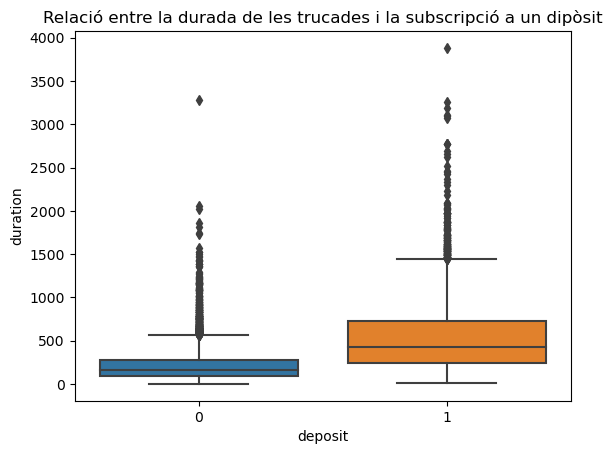

In [8]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
sns.boxplot(x='deposit', y='duration', data=df_BANK_vista_marketing)
plt.title('Relació entre la durada de les trucades i la subscripció a un dipòsit')
plt.show()


Análisis de la relación entre la duración de las llamadas y la probabilidad de suscripción a un depósito a plazo

El gráfico que se muestra es un boxplot que compara la duración de las llamadas realizadas a los clientes con respecto a si terminaron o no suscribiéndose a un depósito a plazo.
Observaciones clave:

    Clientes que no se suscribieron (deposit = 0):
        La duración media de las llamadas está concentrada entre los 0 y 500 segundos.
        La mayoría de las llamadas que no resultaron en una suscripción fueron significativamente más cortas.
        Hay algunos valores atípicos (puntos fuera del diagrama), lo que indica que hubo algunas llamadas largas, pero estas no fueron efectivas.

    Clientes que se suscribieron (deposit = 1):
        Las llamadas que resultaron en una suscripción tienden a ser más largas, con una media más elevada en comparación con los que no se suscribieron.
        El rango intercuartílico (50% de las observaciones centrales) muestra que las llamadas exitosas duran entre 250 y 750 segundos, con un máximo alrededor de 1500 segundos.
        Existe una correlación positiva entre la duración de la llamada y la probabilidad de que el cliente se suscriba.

Implicaciones para el negocio:

    Ajustes en la estrategia de llamadas: Dado que las llamadas más largas tienden a generar más suscripciones, sería beneficioso aumentar la duración de las llamadas o centrarse en mejorar la calidad de las interacciones telefónicas. Esto podría incluir la capacitación de los operadores para mantener al cliente comprometido durante más tiempo o hacer que la oferta sea más atractiva durante la llamada.

    Optimización de los recursos: También se puede considerar identificar a los clientes con mayor potencial de suscripción y asignar más tiempo y recursos a estas llamadas, dado que las llamadas largas parecen ser un factor importante para el éxito.

    Próximos pasos: Para aumentar la tasa de conversión, podríamos explorar estrategias complementarias como la segmentación de clientes y el uso de otros canales de comunicación.

En resumen, el análisis sugiere que inversiones en mejorar la duración y calidad de las interacciones telefónicas pueden aumentar significativamente las tasas de suscripción, lo que representa una oportunidad clave para mejorar el rendimiento de la campaña de marketing.

In [9]:
# Anàlisi de correlació entre la durada i el dipòsit
corr_duration_deposit = df_BANK_vista_marketing[['duration', 'deposit']].corr()

# Mostrem la correlació
print(corr_duration_deposit)

# Opcional: Ajustem un model de regressió logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dividir les dades en features i variable objectiu
X = df_BANK_vista_marketing[['duration']]
y = df_BANK_vista_marketing['deposit']

# Dividir el conjunt de dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el model de regressió logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Avaluació del model
accuracy = logreg.score(X_test, y_test)
print(f"Precisió del model de regressió logística: {accuracy:.2f}")

          duration   deposit
duration  1.000000  0.451919
deposit   0.451919  1.000000
Precisió del model de regressió logística: 0.71


Análisis de la relación entre la duración de las llamadas y la probabilidad de suscripción a un depósito a plazo:

    Análisis de correlación:
        Hemos calculado la correlación entre la variable duración de la llamada y la variable subscripción a un depósito a plazo (representada por deposit, que toma valores de 0 o 1, donde 1 significa que el cliente ha contratado el depósito).
        Resultado: La correlación es de 0.45, lo que indica una relación positiva moderada entre la duración de la llamada y la probabilidad de que el cliente acepte la oferta. En otras palabras, cuanto más larga sea la llamada, mayores son las probabilidades de que el cliente termine suscribiéndose a un depósito.

    Modelo de regresión logística:
        Hemos creado un modelo de regresión logística para predecir si un cliente suscribirá un depósito en función de la duración de la llamada. Este tipo de modelo es adecuado porque estamos tratando de predecir una variable binaria (sí o no) a partir de una característica numérica (duración).
        División del dataset: Para garantizar que el modelo es robusto, dividimos los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%). Entrenamos el modelo con los datos de entrenamiento y lo evaluamos con los de prueba.

    Resultados del modelo:
        El modelo tiene una precisión del 71%, lo que significa que, utilizando únicamente la duración de la llamada, el modelo puede predecir correctamente si un cliente suscribirá un depósito en el 71% de los casos.
        Esto sugiere que la duración de la llamada es un factor relevante, pero no el único, para explicar la probabilidad de suscripción. Incorporar otras variables relacionadas con el perfil del cliente o el tipo de oferta podría mejorar aún más la precisión del modelo.

Implicaciones para el negocio:

    Duración de las llamadas: Sabemos que las llamadas más largas tienden a aumentar la tasa de conversión. Esto abre oportunidades para ajustar la estrategia, centrando los esfuerzos en aumentar la calidad y la duración de las interacciones telefónicas.
    Optimización del modelo: Aunque ya hemos obtenido un buen nivel de predicción (71%), añadir otras características como el tipo de contacto, la campaña específica o datos demográficos del cliente podría mejorar la efectividad del modelo y aumentar las tasas de conversión.

Propuesta:

Basado en este análisis, una inversión en mejorar la duración y calidad de las llamadas, combinada con un modelo predictivo optimizado, puede mejorar considerablemente las tasas de suscripción, lo que impulsará el rendimiento de las campañas de marketing y el retorno sobre la inversión (ROI)